### Часть 1:
-----

### 1. Векторная модель

Зададим небольшую коллекцию документов
------

In [56]:
from gensim import corpora, models, similarities
import matplotlib.pyplot as plt
from pylab import pcolor, show, colorbar, xticks, yticks
import seaborn as sns
import warnings
import nltk
from nltk.corpus import stopwords
from collections import defaultdict
from pprint import pprint

warnings.filterwarnings("ignore")
%matplotlib inline

Просто запишем рандомные предложения, которые будут представлять наш корпус текстовых данных:

In [57]:
documents = ["Visual sequence problems require models to extract hierarchical temporal and representation features simultaneously.",
             "To distinguish and ellaborate an intuitive perception of the function for context bridge module, we will design toy experiment.",
             "We only replace the RNN part in the original Polygon-RNN model with our deep RNN framework.",
             "Second part is the Overlap Coherence Training Scheme aiming at resolving the large resource consuming of deep RNN models",
             "Relation of user perceived response time to error measurement",
             "Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS"
             "The generation of random binary unordered trees",
             "The intersection graph of paths in trees",
             "Graph minors IV Widths of trees and well quasi ordering",
             "A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore."]

#### Предобработка корпуса документов (Corpora Preprocessing):

In [58]:
# Создадим множество стоп слов, от которых будем избавляться в документах корпуса:
stopwords = set(stopwords.words('english'))
# Удаляем стоп-слова
texts = [[word for word in document.lower().split() if word not in stopwords] for document in documents]

In [59]:
# Создадим частотный словарь корпуса документов:
frequency = defaultdict(int)

for text in texts:
    for token in text:
        frequency[token] += 1

###### Стоп-слова удалили, теперь удалим все слова которые встречаются только 1 раз для того чтобы упростить задачу

In [ ]:
texts = [[token for token in text if frequency[token] > 1] for text in texts]
pprint(texts)

### Векторное представление коллекции текстов (Векторное представление языка):

|          | $w_1$    | $w_2$    | $\ldots$ | $w_{V}$  |
|----------|----------|----------|----------|----------|
| $d_1$    | $f_{11}$ | $f_{12}$ |          | $f_{1V}$ |
| $d_2$    | $f_{21}$ | $f_{22}$ |          | $f_{2V}$ |
| $\ldots$ |          |          |          |          |
| $d_{     | D        | }$       | $f_{D1}$ | $f_{D2}$ |          | $f_{DV}$ |

Соответственно, используя векторное представление языка, мы можем использовать различные метрики расстояния для сравнения документов представленных в виде вектора, наиболее популярной метрикой, с которой вы уже знакомы очень близко - косинусное расстояние.

Косинусная мера близости в векторной модели:

$ \cos(d_i, d_j) = \frac {d_i \times d_j}{||d_i||||d_j||} = \frac{\sum_k f_{ki} \times f_{kj}} {\sqrt{(\sum_k f_{ki})^2} \sqrt{(\sum_k f_{kj})^2}}$


Если вектора нормированы на длину $||d_i|| = ||d_j|| = 1$, $ \cos(d_i, d_j) = d_i \times d_j$


Какие еще есть меры близости?

#### Посмотрим как при помощи векторного представления реализовать поиск:
-----


###### Ищем ближайший документ к вектору запроса по косинусной мере близости:

![](./../src/imgs/cosine.png)

In [ ]:
# Зададим словарь и представим текстовые документы в виде векторов при помощи метода из gensim -> corpora.Dictionary(text)
dictionary = corpora.Dictionary(texts)
print(dictionary)
print(dictionary.token2id)

Сформируем корпус векторного представления:

In [ ]:
# здесь хранится непосрдественно векторная модель
corpus = [dictionary.doc2bow(text) for text in texts]
print(corpus)

In [ ]:
# Более наглядно как документы представлены в корпусе:
for doc in corpus:
    print(doc) # [(токен, встречаемость)]

Как искать по запросу (идея):
1. Есть вектор-документ (-ов) допустим v1
2. Есть вектор-запрос (-ов) допустим q1
3. У нас есть векторное представление слово-документ или документ-слово (tf-idf, bow и т.д. в зависимости что выбрали)
4. Необходимо составить вектор для запроса q1 чтобы вектор оказался в том же пространстве слов что и и вектора-документы
5. Вычислить косинусное расстояние между запросом и векторами-документами
6. Выбрать наиболее ближайший документ к запросу


In [ ]:
q = "human computer interaction"
vec = dictionary.doc2bow(q.lower().split())
print(vec)

Вектор-запроса получили, дальше необходимо найти косинусное расстояние между нашим вектором и остальными векторами в векторном представлении:

In [ ]:
index = similarities.MatrixSimilarity(corpus)
print(index)

In [ ]:
sims = index[vec]
sims = sorted(enumerate(sims), key=lambda item: -item[1])
print("Q:", q)

for i in sims:
    print('doc', i[0], documents[i[0]], i[1])

Выше задача была решена на представлении частотности, не совсем хороший подход, можно решить через tf-idf векторное представление.



**Как вы думаете почему?**

Выполним $tf-idf$ преобразование:

In [ ]:
tfidf = models.TfidfModel(corpus)

for word_id in dictionary:
    print("%s – %d – %1.4f" %(dictionary[word_id],  tfidf.dfs[word_id], tfidf.idfs[word_id])) # слова  - tf  - idf

Посмотрим на какой-нибудь документ из корпуса в представлении tf-idf весов:

In [ ]:
corpus[5], tfidf[corpus[5]]

#### **Задание 1**
1. Преобразуйте с помощью $tf-idf$ все вектора из корпуса и создайте новый индекс
2. Преобразуйте вектор запроса с помощью $tf-idf$
3. Как вычисляются $idf$ веса в векторе запроса?
4. Повторите поиск по запросу после $tf-idf$  преобразования

------
### 1.2 Снижение размерности

Матрица TF-IDF является сильно разреженной матрицой, особенно при увеличении количества документов в корпусе. То есть мы задаем пространство очень высокой размерности, но практически оно пустое, поэтому как помним из наших лекций, у нас есть пару фишек для того чтобы справиться с такой проблемой. Один из элементарных способов сделать такую операцию - это сингулярное разложение.

В таком случае у нас есть матрица $М$ которая представляет из себя матрицу $TF-IDF$ (документ-слово, слово-документ). Мы эту матрицу можем разложить на произведение 3-х других матриц - матрицу $U$ матрицу $Sigma$ и матрицу $V^T.$

$U$ будет иметь такую же форму (размерность) как и исходная матрица
$V$ будеть иметь также такуюже форму только транспонированная
$Sigma$ - матрица которая посередине, будет диагональной и квадратной (скорее всего размер будет количество документов х количество документов)




Сингулярное разложение: $M = U \Sigma V^T$

Снижение размерности с помощью сингулярного разложения: $M'_k = U \Sigma_k V^t_k$


![](./../src/imgs/SVD.png)




In [ ]:
## если работаемм через gensim --> задаем LSI модель, число размерностей которые надо оставить Num_topics = 2
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=2)
print(lsi)

In [ ]:
lsi[corpus[0]]

In [ ]:
lsi[vec]

### **1.3 Задача суммирования / суммаризации документа (-ов)**

Автоматическое суммирование — это процесс сокращения (обощения) набора данных с помощью вычислений для создания подмножества (резюме), представляющего наиболее важную или релевантную информацию в исходном контенте. Обобщение текста находит наиболее информативные предложения в документе.

![](./../src/imgs/Summarization.png)
----
Типы суммирования текстовых документов:
----
1. **Extraction-based summarization** - берем считаем наиболее важные последовательности (предложения, токены, N-грамы), сортируем их по какой-либо метрике и выбираем самые информативные из них. То есть подход основан на работе с самим документов и резюме будет представлять наиболее релевантные последовательности из исходного документа.
<br>

2. **Abstract-based summariation** - Методы абстрактного обобщения генерируют новый текст, которого не было в исходном тексте. Абстрактные методы строят внутреннее семантическое представление исходного содержания (часто называемое языковой моделью), а затем используют это представление для создания резюме, более близкого к тому, что может выразить человек. Абстракция может преобразовывать извлеченный контент путем перефразирования разделов исходного документа, чтобы сжать текст сильнее, чем при извлечении. Такое преобразование, однако, в вычислительном отношении намного сложнее, чем извлечение, и требует как обработки естественного языка, так и часто глубокого понимания предметной области исходного текста в случаях, когда исходный документ относится к специальной области знаний.



В то время как EBS можно реализовать при помощи обычного классического машинного обучения, ABS задача представления пространства признаков, то есть Deep Learning - класс моделей RNNs и Transformers.

#### **Задание 2**
1. Возьмите любую одну новостную статью из датасета Bbb (в папке data) по любой тематике.
2. Проведите препроцессинг текстового документа и разбейте статью на предложения.
3. Рассчитайте TF-IDF вектора из списка ваших предложений (то есть вместо документа будут предлоежния).
4. Рассчитайте метрику (например среднее значение ненулевых элементов в TF-IDF векторе)
5. Отсортируйте каждое предложение по метрике (т.е. постройте индекс)
6. Выведите топ 5 предложений, которые и будут финальным решением Extract-Based Summarization подхода.

### Часть 2:
-----

Немного поговорим про семантическое моделирование (для тех кто хочет глубже погрузиться в эту тему, рекомендую лекции и книги Воронцова, так как его тематика именно NLP и семантический анализ/моделирование).

Рассмотрим задачу семантического моделирования а именно Topic Modelling (Моделирование Тематик). В качестве датасета возьмем спаршенные новости из рфных сми (датасет доступен на kaggle), у вас датасет лежит в папке data/ru_news/news.csv Данные по новостям за 2017 год.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [13]:
df = pd.read_csv('./../data/ru_news/news.csv', usecols = ['text','date','event'])
df.sort_values(by = ['event'], inplace = True)
df.head()

text        date  \
650  Яндекс.Новости (news.yandex.ru), Москва, 31 ма...  2017-03-31   
672  Top Real Estate (topre.ru), Москва, 31 марта 2...  2017-03-31   
671  Kremlin Press (kremlinpress.com), Москва, 31 м...  2017-03-31   
670  РБК (rbc.ru), Москва, 31 марта 2017 SPACEX ВПЕ...  2017-03-31   
669  Newstes.ru, Москва, 31 марта 2017 SPACEX ВПЕРВ...  2017-03-31   

                                  event  
650  SpaceX запустила и посадила ракету  
672  SpaceX запустила и посадила ракету  
671  SpaceX запустила и посадила ракету  
670  SpaceX запустила и посадила ракету  
669  SpaceX запустила и посадила ракету

Реализуем стандартную обработку текста:

In [14]:
import re
from pymystem3 import Mystem
from nltk.corpus import stopwords
regex = re.compile("[А-Яа-я]+")

m = Mystem()
mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д']
mystoplemmas = ['который','прошлый','сей', 'свой', 'наш', 'мочь', 'такой']


def words_only(text, regex=regex):
    return " ".join(regex.findall(text))

def remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""

def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()
    except:
        return " "

def  remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""

In [15]:
df.text = df.text.apply(lemmatize)

In [16]:
df.text = df.text.str.lower()

In [17]:
df.text = df.text.apply(words_only)

In [18]:
df.text = df.text.apply(remove_stopwords)

In [19]:
df.text = df.text.apply(remove_stoplemmas)

Представление данных в Gensim словарем и корпусом:

In [20]:
from gensim.corpora import *

texts = [df.text.iloc[i].split() for i in range(len(df))]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

Вычисление сходства по косинусной мере на векторах $tf-idf$:

In [21]:
%%time
from gensim.models import  *
from gensim import similarities

tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

index = similarities.MatrixSimilarity(corpus_tfidf)
sims = index[corpus_tfidf]

CPU times: total: 5.62 s
Wall time: 2.14 s


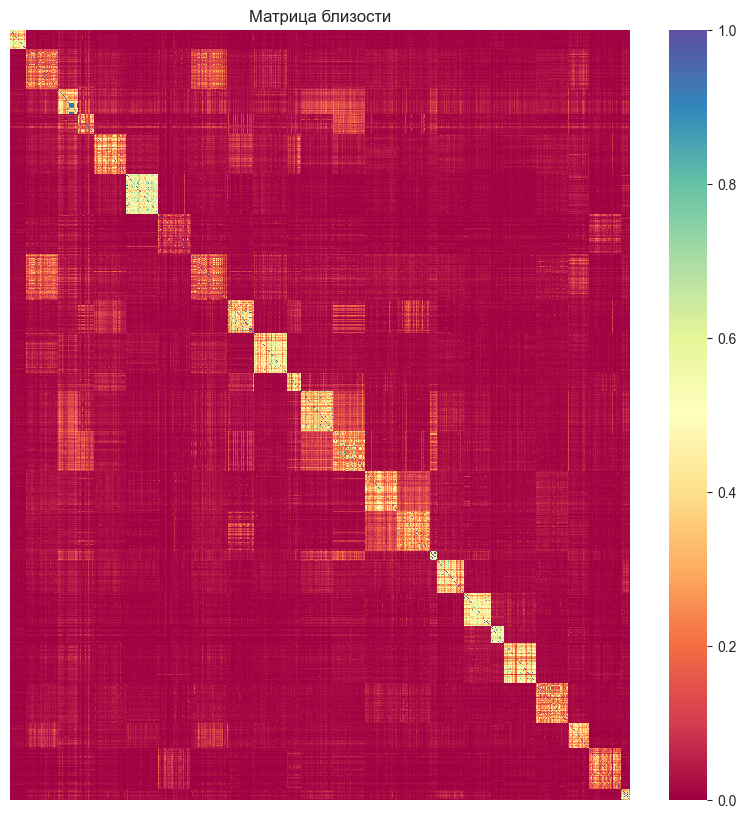

In [22]:
from pylab import pcolor, show, colorbar, xticks, yticks
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10,10))
sns.heatmap(data=sims, cmap = 'Spectral').set(xticklabels=[],yticklabels=[])
plt.title("Матрица близости")
plt.show()

## Модели скрытых тем


Модели скрытых тем в контексте сингулярного разложения (выше) выглядят примерно как на схеме. У нас есть N тем (например 2), то есть 2 размерности на плоскости. У этих тем, есть веса Темы-слова и Темы-Документы (интерпритация разложения).  Конструкция ниже (схема) - это так называемая модель скрытых тем. Стоит учесть факт, что темы мы не наблюдаем, мы наблюдаем скрытые документы и представления слов. Количество тем мы не обучаем, это некий гиперпараметр, который мы выбираем сами.


![рисунок](./../src/imgs/topics-docspng.png)

### Латентно-семантический анализ [LSI]

Сингулярное разложение: $M'_k = U \Sigma_k V^t_k$

* $M$ – матрица слово-документ
* $U$ – матрица слово-тема
* $k$ – число тем
* $V$ - матрица документ-тема

In [23]:
%%time
lsi = lsimodel.LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=30)

CPU times: total: 3.64 s
Wall time: 1.29 s


In [24]:
lsi.show_topics(5)

[(0,
  '0.226*"путин" + 0.168*"трамп" + 0.148*"меркель" + 0.133*"президент" + 0.127*"выборы" + 0.116*"курортный" + 0.113*"навальный" + 0.112*"акция" + 0.109*"теракт" + 0.102*"собор"'),
 (1,
  '0.550*"курортный" + 0.466*"сбор" + 0.235*"законопроект" + 0.212*"эксперимент" + 0.158*"инфраструктура" + 0.148*"введение" + 0.130*"вносить" + 0.119*"крым" + 0.119*"край" + 0.111*"алтайский"'),
 (2,
  '0.394*"собор" + 0.295*"исаакиевский" + 0.228*"передача" + -0.227*"путин" + 0.225*"рпц" + 0.212*"акция" + -0.210*"меркель" + -0.161*"трамп" + 0.149*"петербург" + 0.146*"навальный"'),
 (3,
  '0.322*"теракт" + -0.262*"собор" + 0.250*"барселона" + -0.195*"исаакиевский" + -0.175*"путин" + -0.174*"меркель" + 0.171*"лондон" + -0.152*"передача" + -0.148*"рпц" + 0.137*"евтушенко"'),
 (4,
  '0.489*"евтушенко" + 0.326*"чуркин" + 0.317*"поэт" + 0.247*"евгений" + 0.159*"виталий" + 0.158*"умирать" + -0.154*"партия" + 0.134*"оон" + -0.133*"теракт" + -0.116*"великобритания"')]

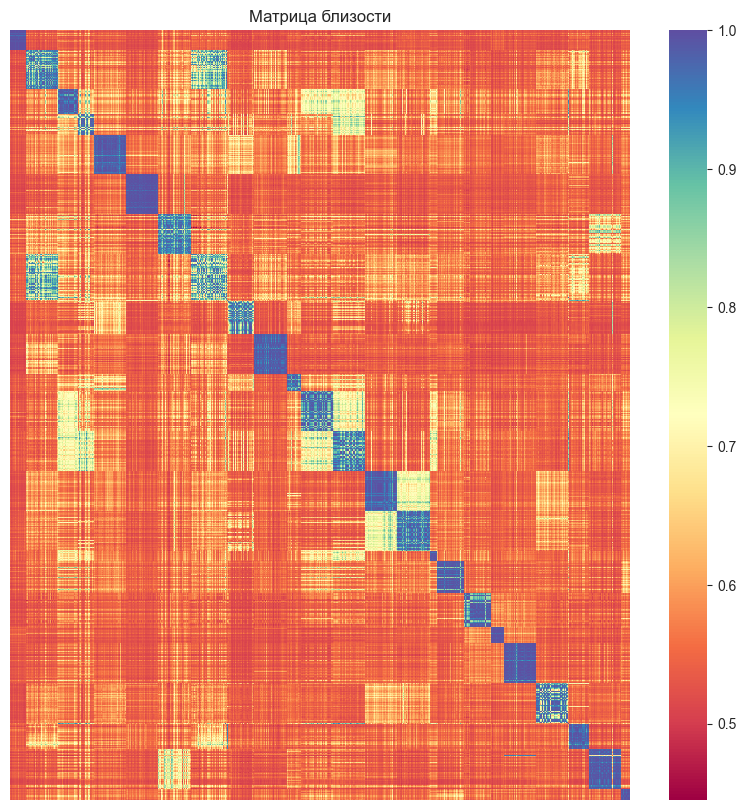

In [25]:
corpus_lsi = lsi[corpus]
index = similarities.MatrixSimilarity(lsi[corpus])
sims = index[corpus_lsi]
sims  = (sims + 1)/2.

plt.figure(figsize = (10,10))
sns.heatmap(data=sims, cmap = 'Spectral').set(xticklabels=[], yticklabels=[])
plt.title("Матрица близости")
plt.show()

### Главные компоненты

In [26]:
X = [0] * len(df)
Y = [0] * len(df)
for i in range(len(df)):
    vec = corpus[i]
    LSI_topics = (lsi[vec])
    try:
        for topic in LSI_topics:
            if topic[0] == 0:
                X[i] = topic[1]
            elif topic[0] == 1:
                Y[i] = topic[1]
    except:
        pass
vis_df = pd.DataFrame({'X': X, 'Y': Y, 'topic' : df.event})

<Figure size 1500x1000 with 0 Axes>

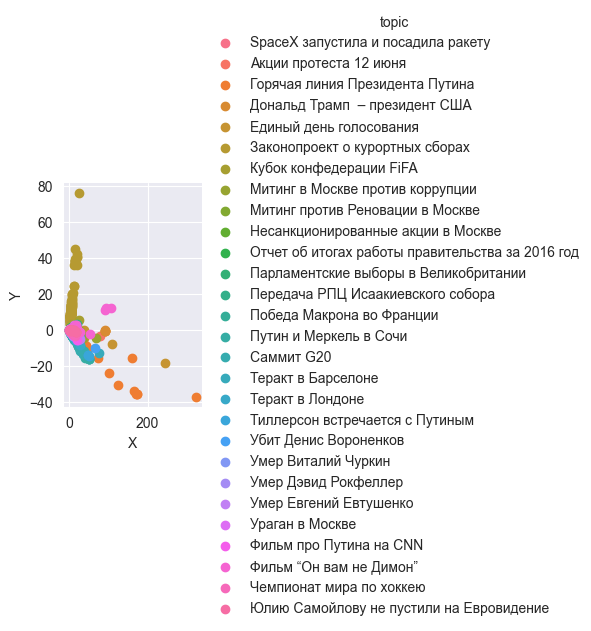

In [29]:
plt.figure(figsize=(15, 10))
sns.FacetGrid(vis_df, hue="topic").map(plt.scatter, "X", "Y").add_legend()

### Латентное размещение Дирихле [LDA]

Генеративная модель порождения документа, оценивает распределение тем по документам и слов по темам:

$p(слово|документ) = \sum_{тема} P(тема|документ) P(слово|тема)$

![](./../src/imgs/LDA.png)

In [30]:
%%time
lda = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=15,
                        alpha='auto', eta='auto', iterations = 20, passes = 5)

CPU times: total: 15.8 s
Wall time: 16.3 s


In [31]:
lda.show_topics(5)

[(6,
  '0.009*"человек" + 0.007*"евтушенко" + 0.007*"москва" + 0.006*"год" + 0.006*"россия" + 0.005*"время" + 0.005*"весь" + 0.005*"говорить" + 0.004*"область" + 0.003*"поэт"'),
 (14,
  '0.022*"медведев" + 0.018*"фонд" + 0.008*"расследование" + 0.007*"фбк" + 0.007*"дмитрий" + 0.006*"премьер" + 0.006*"год" + 0.006*"дар" + 0.006*"компания" + 0.006*"весь"'),
 (9,
  '0.016*"акция" + 0.013*"навальный" + 0.012*"человек" + 0.011*"митинг" + 0.009*"москва" + 0.009*"россия" + 0.008*"власть" + 0.007*"год" + 0.006*"протест" + 0.006*"задерживать"'),
 (11,
  '0.026*"выборы" + 0.012*"избирательный" + 0.010*"партия" + 0.010*"россия" + 0.010*"голосование" + 0.010*"область" + 0.009*"явка" + 0.009*"глава" + 0.009*"регион" + 0.009*"участок"'),
 (5,
  '0.022*"путин" + 0.014*"президент" + 0.011*"россия" + 0.011*"вопрос" + 0.008*"год" + 0.007*"сказать" + 0.007*"сша" + 0.007*"владимир" + 0.006*"российский" + 0.005*"евтушенко"')]

In [34]:

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
vis_data = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(vis_data)

In [36]:
import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode()

def plot_difference(mdiff, title="", annotation=None):
    """
    Helper function for plot difference between models
    """
    annotation_html = None
    if annotation is not None:
        annotation_html = [
            [
                "+++ {}<br>--- {}".format(", ".join(int_tokens), ", ".join(diff_tokens))
                for (int_tokens, diff_tokens) in row
            ]
            for row in annotation
        ]

    data = go.Heatmap(z=mdiff, colorscale='RdBu', text=annotation_html)
    layout = go.Layout(width=500, height=500, title=title, xaxis=dict(title="topic"), yaxis=dict(title="topic"))
    py.iplot(dict(data=[data], layout=layout))

In [37]:
mdiff, annotation = lda.diff(lda, distance='jaccard', num_words=50)
plot_difference(mdiff, title="Topic difference (one model) [jaccard distance]", annotation=annotation)

D:\WorkingDirectory\venv\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

D:\WorkingDirectory\venv\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



### TSNE

In [38]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import *

vectors = TfidfVectorizer().fit_transform(df.text)
X_reduced = TruncatedSVD(n_components=5, random_state=0).fit_transform(vectors)
X_embedded = TSNE(n_components=2, perplexity=5, verbose=0).fit_transform(X_reduced)

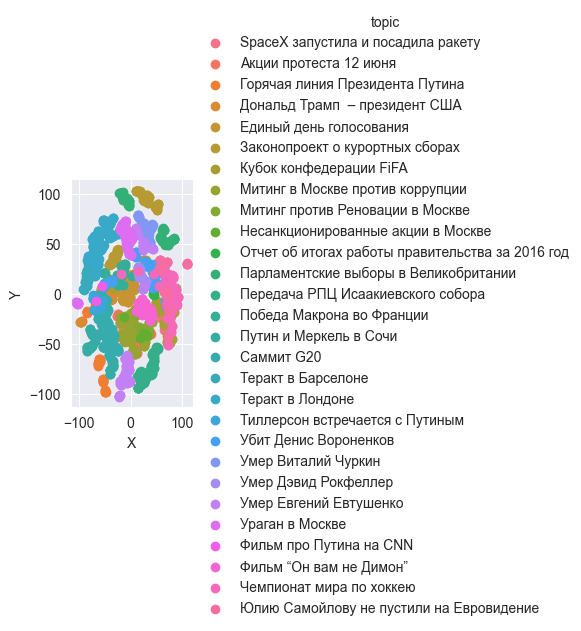

In [41]:
vis_df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'topic' : df.event})
sns.FacetGrid(vis_df, hue="topic").map(plt.scatter, "X", "Y").add_legend()